In [2]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
birth_data = pd.read_csv("births.csv")
# Display
birth_data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [4]:
# Chech the information of the dataset

birth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
# Is there any NaN value in our data set
birth_data.isnull().values.any()

True

In [6]:
# Fill NaN values by 0
birth_data = birth_data.fillna(0)

# converting 'day column' from float to int
birth_data['day'] = birth_data['day'].astype(int)

# Convert all years to decades
birth_data["decades"] = (birth_data["year"]//10)*10
birth_data.head()

,year,month,day,gender,births,decades
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [7]:
birth_decade = birth_data.pivot_table('births', index='decades', columns='gender', aggfunc='sum')

# Change the population in Millions
birth_decade['F'],birth_decade['M'] = birth_decade['F']/10**6 , birth_decade['M']/10**6
birth_decade

gender,F,M
decades,,
1960,1.753634,1.846572
1970,16.263075,17.121550
1980,18.310351,19.243452
1990,19.479454,20.420553
2000,18.229309,19.106428


<Figure size 720x504 with 0 Axes>

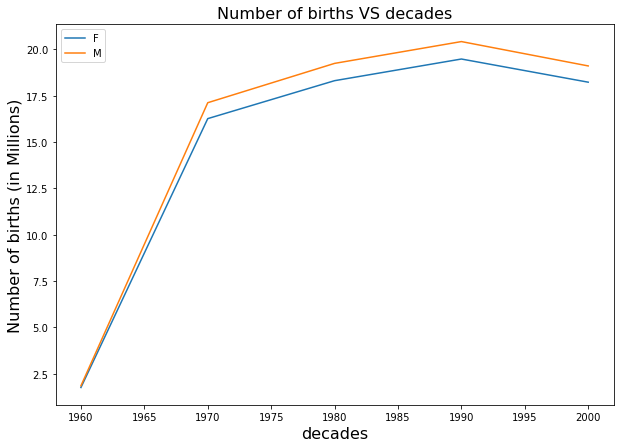

In [8]:
# Plot the figure

plt.rcParams["figure.figsize"] = (10,7)
fig = plt.figure()
birth_decade.plot()
plt.ylabel("Number of births (in Millions)",fontsize=16)
plt.xlabel("decades",fontsize=16)
plt.title("Number of births VS decades",fontsize=16)
plt.legend()
plt.show()

fig. savefig('test.png')